#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel  </font>

##### <font color="#03997A"> Modulo 8 Introducción al Deep Learning </font>

##### <font color="#03997A"> Tema 3 Representación de operaciones matriciales en lenguaje tensorial (apliado a clasicación de imagenes)    Alumno: Ibarra Ramírez Sergio </font>

La data será tomada de: MNIST handwritten digit database, Yann LeCun, Corinna Cortes and Chris Burges

Se descargará la data de los digitos escritos a mano

In [35]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [36]:
import requests

urls = [
    "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"
]

for url in urls:
    filename = url.split("/")[-1]  # Extract the filename from the URL
    response = requests.get(url)
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"Downloaded {filename}")


Downloaded train-images-idx3-ubyte.gz
Downloaded train-labels-idx1-ubyte.gz
Downloaded t10k-images-idx3-ubyte.gz
Downloaded t10k-labels-idx1-ubyte.gz


Se deben descomprimir los datos pues están en modo .gz

In [37]:
!gzip -d train-images-idx3-ubyte.gz
!gzip -d train-labels-idx1-ubyte.gz
!gzip -d t10k-images-idx3-ubyte.gz
!gzip -d t10k-labels-idx1-ubyte.gz

gzip: train-images-idx3-ubyte already exists;	not overwritten
gzip: train-labels-idx1-ubyte already exists;	not overwritten
gzip: t10k-images-idx3-ubyte already exists;	not overwritten
gzip: t10k-labels-idx1-ubyte already exists;	not overwritten


In [38]:
import requests
import gzip
import shutil

urls = [
    "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"
]

for url in urls:
    filename = url.split("/")[-1]  # Extract the filename from the URL
    response = requests.get(url)
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"Downloaded {filename}")
    
    # Unzip the file
    with gzip.open(filename, "rb") as f_in:
        with open(filename[:-3], "wb") as f_out:  # Remove the .gz extension from the filename
            shutil.copyfileobj(f_in, f_out)
    print(f"Unzipped {filename}")


Downloaded train-images-idx3-ubyte.gz
Unzipped train-images-idx3-ubyte.gz
Downloaded train-labels-idx1-ubyte.gz
Unzipped train-labels-idx1-ubyte.gz
Downloaded t10k-images-idx3-ubyte.gz
Unzipped t10k-images-idx3-ubyte.gz
Downloaded t10k-labels-idx1-ubyte.gz
Unzipped t10k-labels-idx1-ubyte.gz


Debemos guardar las imagenes en variables 

In [39]:
import idx2numpy

ruta_train_images = 'train-images-idx3-ubyte'
ruta_train_labels = 'train-labels-idx1-ubyte'
ruta_test_images = 't10k-images-idx3-ubyte'
ruta_test_labels = 't10k-labels-idx1-ubyte'

train_images = idx2numpy.convert_from_file(ruta_train_images)
train_labels = idx2numpy.convert_from_file(ruta_train_labels)
test_images = idx2numpy.convert_from_file(ruta_test_images)
test_labels = idx2numpy.convert_from_file(ruta_test_labels)

In [40]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [41]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Para intentar visualizar los datos 

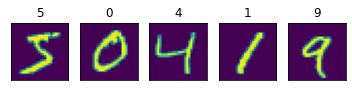

In [42]:
import matplotlib.pyplot as plt

imagenes_mostrar = train_images[:5] # unas 5
labels_mostrar = train_labels[:5]
for i, (img,label) in enumerate(zip(imagenes_mostrar,labels_mostrar)):
    plt.subplot(151 + i) #esto es para que las ponga lado a lado, se interpreta cada dígito (1: renglon, 5:columnas, x: el indice en el que se va poniendo)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(label)

In [43]:
train_images.reshape([-1,784]).shape

(60000, 784)

Volvemos a importar los datos y normalizarlos 

In [44]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import normalize

X,y = fetch_openml('mnist_784', as_frame=False, return_X_y=True)

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [45]:
X = normalize(X)

In [46]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [47]:
X_train.shape

(60000, 784)

In [48]:
y_train.shape

(60000,)

##### Vamos a hacer Encoding de nuestros datos de entrnamiento 

In [49]:
from sklearn.preprocessing import OneHotEncoder

codificador = OneHotEncoder(handle_unknown='ignore',sparse=False)
y_train = codificador.fit_transform(y_train.reshape(-1,1))
y_test = codificador.transform(y_test.reshape(-1,1))

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Uso de Tensorflow para operaciones matriciales en redes neuronales 

In [50]:
import tensorflow as tf

##### Preparación del dataset

In [51]:
X_train = tf.constant(X_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)

In [52]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(784,), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.float32, name=None))>

In [53]:
batch_size = 100 # Hiperparámetro
train_dataset = train_dataset.shuffle(batch_size).batch(batch_size)

##### Preparación variables

In [17]:
b = tf.Variable(tf.random.normal([10]))
W = tf.Variable(tf.random.normal([784,10]))
W

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32, numpy=
array([[-0.30753258, -1.2149626 , -1.9931554 , ...,  0.13749386,
         2.0993571 , -0.37690735],
       [-0.06764327,  0.49559096, -0.29431745, ..., -0.40764785,
         0.78381425,  0.47021767],
       [-0.7162544 , -0.32125425, -1.6100748 , ...,  0.23286887,
         0.26749995,  1.322216  ],
       ...,
       [ 0.20663024, -0.7190787 ,  0.1175336 , ..., -0.62844926,
        -0.5854526 , -1.1917955 ],
       [ 0.6415726 ,  0.8884698 , -0.44208544, ..., -0.5167156 ,
         0.30139846,  1.6096809 ],
       [ 0.5068232 , -0.99827564, -0.07359977, ..., -0.03207283,
         1.4565719 ,  1.9155548 ]], dtype=float32)>

Una vez que se definan las constantes y varibles se debe usar un optimizador (Nosotros sabemusar el stochastich gradient descent)

In [18]:
optimizador = tf.keras.optimizers.experimental.SGD(learning_rate=0.1)
optimizador


Se entrena como tal a la red (recordando que cada que se recorre el train y teast por completo 1 vez se habrá terminado 1 epoch)

In [23]:
epochs = 10
for _ in range(epochs):
  loss_epoch = 0
  for x,y in train_dataset:
    with tf.GradientTape() as gt:
      operacion_matricial = tf.matmul(x,W)+b
      probs = tf.nn.softmax(operacion_matricial)

      prob_as = probs*y
      vec_probs = tf.reduce_sum(prob_as,axis=1)
      x_ent = -tf.math.log(vec_probs)
      loss = tf.reduce_mean(x_ent)
      optimizador.minimize(loss,[W,b],gt) # Poderosa

    loss_epoch += loss/len(train_dataset)
  print(loss_epoch)

tf.Tensor(2.1756396, shape=(), dtype=float32)
tf.Tensor(1.656294, shape=(), dtype=float32)
tf.Tensor(1.3567187, shape=(), dtype=float32)
tf.Tensor(1.1640776, shape=(), dtype=float32)
tf.Tensor(1.03269, shape=(), dtype=float32)
tf.Tensor(0.93807155, shape=(), dtype=float32)
tf.Tensor(0.8668094, shape=(), dtype=float32)
tf.Tensor(0.81120795, shape=(), dtype=float32)
tf.Tensor(0.76654804, shape=(), dtype=float32)
tf.Tensor(0.72984254, shape=(), dtype=float32)


Predicción del test - y TEIENDO LOS VALORES DE w Y B OPTIMOS SE HACE DE NUEVO EL FORWARD PARA ENCONTRAR LA PROBABILIDAD DEL ARRAY DE 10 QUE ASIGNO EL MODELOS EN CADA CASO

In [24]:
# Salida
operacion_matricial = tf.matmul(X_test,W)+b
probs = tf.nn.softmax(operacion_matricial)

# Comparación
max_preds = tf.argmax(probs,1)
max_trues = tf.argmax(y_test,1)

numCorrectos = tf.equal(max_preds,max_trues)
acc = tf.reduce_mean(tf.cast(numCorrectos,tf.float32))
print(acc)

tf.Tensor(0.8354, shape=(), dtype=float32)


Las probabilidades de cada entrada del test está almacenado en probs 

In [28]:
tf.argmax(probs[1])

<tf.Tensor: shape=(), dtype=int64, numpy=2>

## Red multicapa  

Se va requerir un juego de pesos por cada capa que se agrega

In [19]:
b1 = tf.Variable(tf.random.normal([100]))
W1 = tf.Variable(tf.random.normal([784,100]))
W1

<tf.Variable 'Variable:0' shape=(784, 100) dtype=float32, numpy=
array([[-1.0655898 ,  0.5867856 ,  0.10278023, ..., -0.67171293,
         1.0557408 , -0.29290366],
       [-0.01960463,  3.14933   , -0.76875454, ..., -0.10600251,
         0.8589007 , -0.3688518 ],
       [-0.14322668, -1.0788453 ,  0.89401436, ..., -0.93378145,
        -0.26838753,  0.61136794],
       ...,
       [ 0.15409707, -1.173028  , -0.21940331, ...,  0.03382182,
        -0.01626117, -0.06933744],
       [ 0.53452945,  1.6555804 ,  0.00797502, ...,  0.79151964,
        -0.49383244, -2.0725996 ],
       [ 0.7187016 , -0.1269963 ,  0.4467561 , ...,  0.33816636,
        -0.6230622 , -1.2263203 ]], dtype=float32)>

Por lo tanto se agregam los de la capa 2
El numero de neuronas en un parametro libre a a justar.
Pero la salida de una capa l son las mimsmas que la entrada de una capa l+1 
Por ejemplo

In [20]:
b2 = tf.Variable(tf.random.normal([10]))
W2 = tf.Variable(tf.random.normal([100,10]))
W2

<tf.Variable 'Variable:0' shape=(100, 10) dtype=float32, numpy=
array([[-9.88353137e-03,  9.36933517e-01,  6.56131506e-01,
        -1.69056296e+00,  2.59717196e-01,  4.22680050e-01,
         5.43487668e-01,  4.69151646e-01, -6.61247373e-01,
        -9.02418911e-01],
       [-8.57270539e-01,  2.54323602e-01, -8.25115442e-01,
        -1.41898108e+00, -3.20903093e-01, -5.17130017e-01,
         1.75811157e-01, -2.28767097e-01,  9.77552906e-02,
        -4.32990015e-01],
       [-1.54011345e+00, -5.28988779e-01, -8.49090278e-01,
         8.90005291e-01, -1.53810427e-01,  6.72276914e-01,
        -5.43877125e-01, -2.30838013e+00,  9.97328699e-01,
        -8.33864152e-01],
       [-1.69103789e+00,  1.55457532e+00, -1.40280604e+00,
        -2.61505961e-01,  5.12895644e-01,  4.32088226e-01,
        -2.04270577e+00,  3.20805728e-01, -7.20988512e-01,
         1.13052714e+00],
       [-9.85208035e-01,  1.47641510e-01,  5.71585953e-01,
         9.71475720e-01,  1.05501604e+00,  1.51857769e+00,
      

Recordar que es necesario tener entre capa y capa una función de activación no lineal 

In [ ]:
optimizador = tf.keras.optimizers.experimental.SGD(learning_rate=0.1)


In [54]:
b1 = tf.Variable(tf.random.normal([100]))
W1 = tf.Variable(tf.random.normal([784,100]))

b2 = tf.Variable(tf.random.normal([10]))
W2 = tf.Variable(tf.random.normal([100,10]))

In [55]:
optimizador = tf.keras.optimizers.experimental.SGD(learning_rate=0.1)


In [56]:
epochs = 10
for _ in range(epochs):
  loss_epoch = 0
  for x,y in train_dataset: # Es un batch
    with tf.GradientTape() as gt:
      # Forward
      operacion_matricial = tf.matmul(x,W1)+b1 # Primera capa
      capa1 = tf.nn.relu(operacion_matricial)

      capa2 = tf.matmul(capa1,W2)+b2

      probs = tf.nn.softmax(capa2)

        # Loss
      prob_as = probs*y # Probabilidades de las clases correctas (a)
      vec_probs = tf.reduce_sum(prob_as,axis=1)
      x_ent = -tf.math.log(vec_probs)
      loss = tf.reduce_mean(x_ent)

      # Backward
      optimizador.minimize(loss,[W1,b1,W2,b2],gt) # No olvidar cuáles son los parámetros a ajustar

    loss_epoch += loss/len(train_dataset)
  print(loss_epoch)

tf.Tensor(1.5095205, shape=(), dtype=float32)
tf.Tensor(0.64862704, shape=(), dtype=float32)
tf.Tensor(0.52807236, shape=(), dtype=float32)
tf.Tensor(0.46942532, shape=(), dtype=float32)
tf.Tensor(0.4320433, shape=(), dtype=float32)
tf.Tensor(0.405429, shape=(), dtype=float32)
tf.Tensor(0.38450548, shape=(), dtype=float32)
tf.Tensor(0.36773553, shape=(), dtype=float32)
tf.Tensor(0.3536484, shape=(), dtype=float32)
tf.Tensor(0.34167346, shape=(), dtype=float32)


In [57]:
# Salida
operacion_matricial = tf.matmul(X_test,W1)+b1
capa1 = tf.nn.relu(operacion_matricial)

capa2 = tf.matmul(capa1,W2)+b2

probs = tf.nn.softmax(capa2)

# Comparación
max_preds = tf.argmax(probs,1)
max_trues = tf.argmax(y_test,1)

numCorrectos = tf.equal(max_preds,max_trues)
acc = tf.reduce_mean(tf.cast(numCorrectos,tf.float32))
print(acc)

tf.Tensor(0.8991, shape=(), dtype=float32)
